In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 2

# Paths to your dataset - update these paths accordingly
train_path = '/home/bubbles/Quantbit Internship/train'
validation_path = '/home/bubbles/Quantbit Internship/test'

# Preprocessing and Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Load pre-trained ResNet50 without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers from the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Epoch 1/30
18/18 [==============================] - 66s 3s/step - loss: 1.7082 - accuracy: 0.5350 - val_loss: 0.8629 - val_accuracy: 0.5000
Epoch 2/30
18/18 [==============================] - 61s 3s/step - loss: 1.0868 - accuracy: 0.4650 - val_loss: 0.7679 - val_accuracy: 0.4857
Epoch 3/30
18/18 [==============================] - 61s 3s/step - loss: 0.9671 - accuracy: 0.4937 - val_loss: 0.9158 - val_accuracy: 0.5071
Epoch 4/30
18/18 [==============================] - 60s 3s/step - loss: 0.9263 - accuracy: 0.4973 - val_loss: 0.7027 - val_accuracy: 0.5643
Epoch 5/30
18/18 [==============================] - 60s 3s/step - loss: 0.8454 - accuracy: 0.4955 - val_loss: 0.7024 - val_accuracy: 0.5357
Epoch 6/30
18/18 [==============================] - 62s 3s/step - loss: 0.8004 - accuracy: 0.5099 - val_loss: 0.7046 - val_accuracy: 0.5357
Epoch 7/30
18/18 [==============================] - 60s 3s/step - loss: 0.7501

1/1 [==============================] - 0s 136ms/step


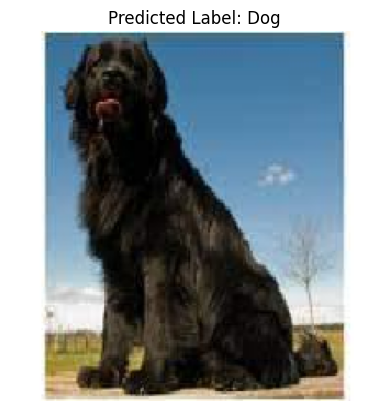

In [43]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Path to your dataset directory containing 'cats' and 'dogs' subdirectories
dataset_path = '/home/bubbles/Quantbit Internship/test'

# Function to preprocess an image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# List all image files in the dataset directory
cat_images = os.listdir(os.path.join(dataset_path, 'cats'))
dog_images = os.listdir(os.path.join(dataset_path, 'dogs'))

# Randomly select a cat or dog image
random_cat_image = random.choice(cat_images)
random_dog_image = random.choice(dog_images)

# Select the complete path to the random image
random_cat_image_path = os.path.join(dataset_path, 'cats', random_cat_image)
random_dog_image_path = os.path.join(dataset_path, 'dogs', random_dog_image)

# Choose which image to use for prediction
random_image_path = random_cat_image_path if random.randint(0, 1) == 0 else random_dog_image_path

# Preprocess the image
preprocessed_image = preprocess_image(random_image_path)

# Make a prediction
predictions = model.predict(preprocessed_image)
predicted_class = np.argmax(predictions)

# Map the class index to the class label (0 for cats, 1 for dogs)
class_labels = {0: 'Dog', 1: 'Cat'}

# Get the predicted class label
predicted_label = class_labels[predicted_class]

# Display the image
img = image.load_img(random_image_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted Label: {predicted_label}")
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

IMAGE_SIZE = (227, 227)
BATCH_SIZE = 32
NUM_CLASSES = 2 
train_path = '/home/bubbles/Quantbit Internship/train'
validation_path = '/home/bubbles/Quantbit Internship/test'

# Preprocessing and Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
model = Sequential()

# Convolutional layers
model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(227, 227, 3)))
model.add(MaxPooling2D((3, 3), strides=(2, 2)))
model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D((3, 3), strides=(2, 2)))
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((3, 3), strides=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()
